In [1]:
import pandas as pd
import numpy as np

# Load the data set
raw_df = pd.read_csv('Life-Expectancy-Data-Updated.csv')

# Display basic info (to verify no values are missing)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [2]:
raw_df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [3]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(raw_df, columns=['Region'])

# Select region columns
region_columns = data_encoded[[col for col in data_encoded.columns if col.startswith('Region')]]

# Check the number of datapoints in each region
true_counts = region_columns.sum()
print(true_counts)



Region_Africa                           816
Region_Asia                             432
Region_Central America and Caribbean    304
Region_European Union                   432
Region_Middle East                      224
Region_North America                     48
Region_Oceania                          176
Region_Rest of Europe                   240
Region_South America                    192
dtype: int64


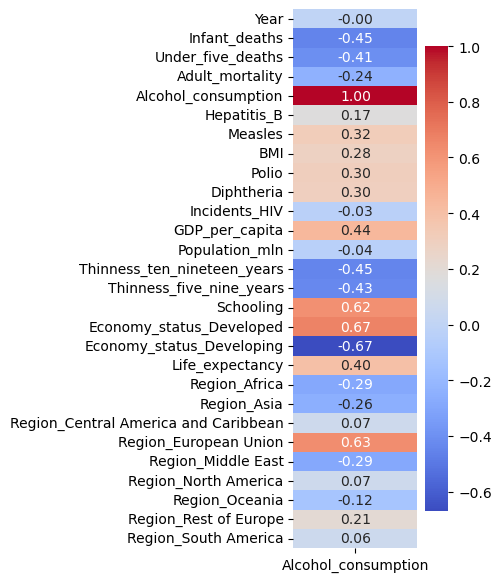

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display correlations with alcohol consumption
correlation_matrix = data_encoded.drop(['Country'], axis=1).corr()
plt.figure(figsize=(2,7))
sns.heatmap(correlation_matrix['Alcohol_consumption'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

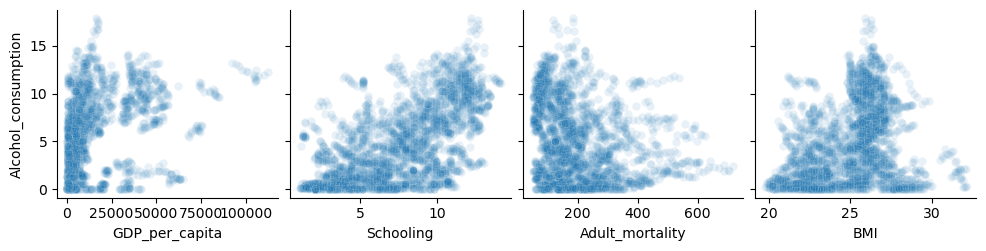

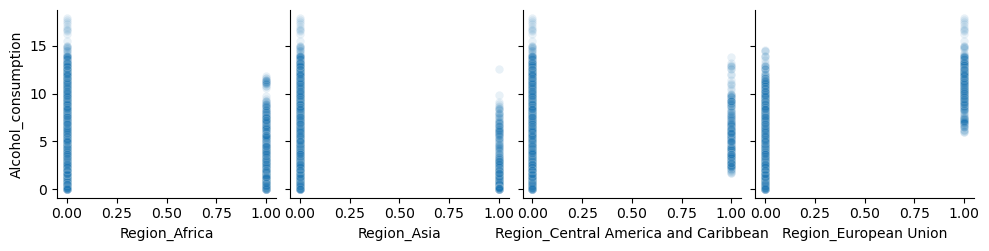

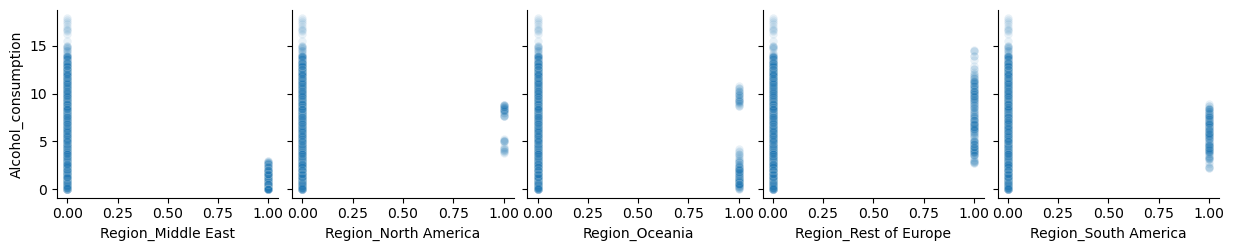

In [5]:
# Display pairwise relationships between alcohol consumption and the selected features

sns.pairplot(data_encoded, 
             y_vars=['Alcohol_consumption'], 
             x_vars=['GDP_per_capita', 'Schooling', 'Adult_mortality', 'BMI'],
             plot_kws={'alpha': 0.1})

sns.pairplot(data_encoded,
             y_vars=['Alcohol_consumption'],
             x_vars=['Region_Africa', 'Region_Asia', 'Region_Central America and Caribbean', 
                    'Region_European Union'],
             plot_kws={'alpha': 0.1})

sns.pairplot(data_encoded,
             y_vars=['Alcohol_consumption'],
             x_vars=['Region_Middle East', 'Region_North America',
                    'Region_Oceania', 'Region_Rest of Europe', 'Region_South America'],
             plot_kws={'alpha': 0.1})

plt.show()



In [6]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
import math

# Specify the features and target variable
features = ['GDP_per_capita', 'Schooling', 'Adult_mortality', 'BMI'] + \
            [col for col in data_encoded.columns if col.startswith('Region')]
target = 'Alcohol_consumption'

# Separate the features and target
X = data_encoded[features]
y = data_encoded[target]

# Split data into training and test sets
X, X_test_final, y, y_test_final = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the linear regression model
lr_model = LinearRegression()

# Set up K-fold cross-validation with k=5
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Lists to store training and validation MSE for each fold
training_errors = []
validation_errors = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    lr_model.fit(X_train, y_train)
    
    # Make predictions on the training set
    y_train_pred = lr_model.predict(X_train)
    training_mse = mean_squared_error(y_train, y_train_pred)
    training_errors.append(training_mse)
    
    # Make predictions on the validation set
    y_test_pred = lr_model.predict(X_test)
    validation_mse = mean_squared_error(y_test, y_test_pred)
    validation_errors.append(validation_mse)

# Print training and validation errors for each fold
print("Linear Regression")
print("Training Mean Squared Errors for each fold:", training_errors)
print("Validation Mean Squared Errors for each fold:", validation_errors)

# Calculate and print the mean of training and validation MSE
training_mse_mean = sum(training_errors) / len(training_errors)
validation_mse_mean = sum(validation_errors) / len(validation_errors)

print(f'Mean Training MSE: {training_mse_mean}')
print(f'Mean Validation MSE: {validation_mse_mean}')

# Print RMSE for validation
print(f'Root of Validation MSE: {math.sqrt(validation_mse_mean)}')

Linear Regression
Training Mean Squared Errors for each fold: [4.9882800204310795, 4.9848271283020225, 5.1579530171028996, 4.960234478862073, 4.970171486815256]
Validation Mean Squared Errors for each fold: [5.162044347700042, 5.185627799024727, 4.52055025826989, 5.284150157393694, 5.2747919068380655]
Mean Training MSE: 5.012293226302666
Mean Validation MSE: 5.085432893845283
Root of Validation MSE: 2.2550904402806737


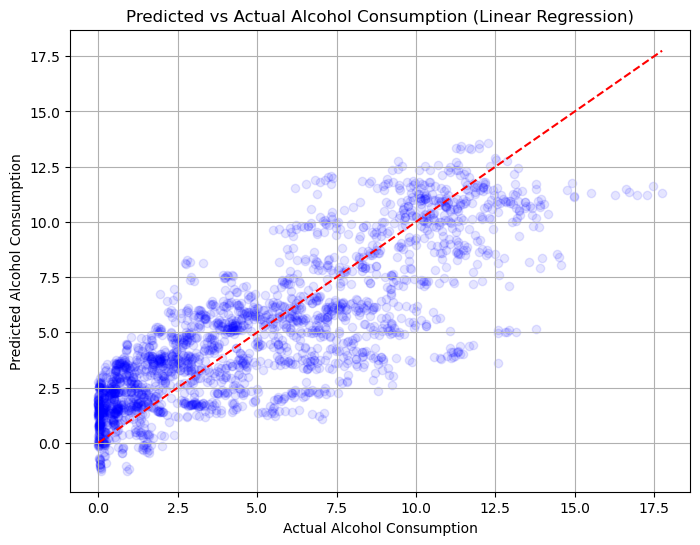

In [7]:
# Cross-validation predictions (using all validation folds combined)
y_pred = cross_val_predict(lr_model, X, y, cv=kf)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.1)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Predicted vs Actual Alcohol Consumption (Linear Regression)')
plt.xlabel('Actual Alcohol Consumption')
plt.ylabel('Predicted Alcohol Consumption')
plt.grid(True)
plt.show()



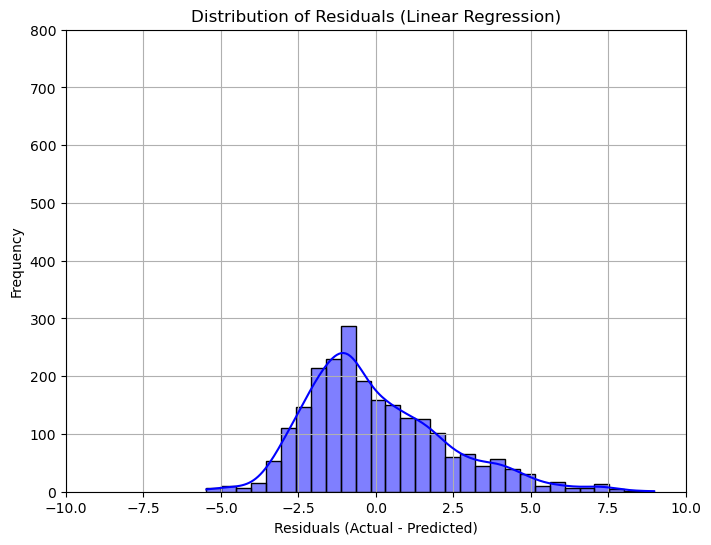

In [8]:
# Plot the distribution of residuals
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.xlim(-10,10)
plt.ylim(0,800)
plt.title('Distribution of Residuals (Linear Regression)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


GDP_per_capita                          0.000029
Schooling                               0.527378
Adult_mortality                         0.006747
BMI                                    -0.186956
Region_Africa                          -1.249087
Region_Asia                            -2.396466
Region_Central America and Caribbean    0.966591
Region_European Union                   4.326048
Region_Middle East                     -3.472559
Region_North America                    0.764036
Region_Oceania                         -1.519368
Region_Rest of Europe                   1.489621
Region_South America                    1.091185
dtype: float64


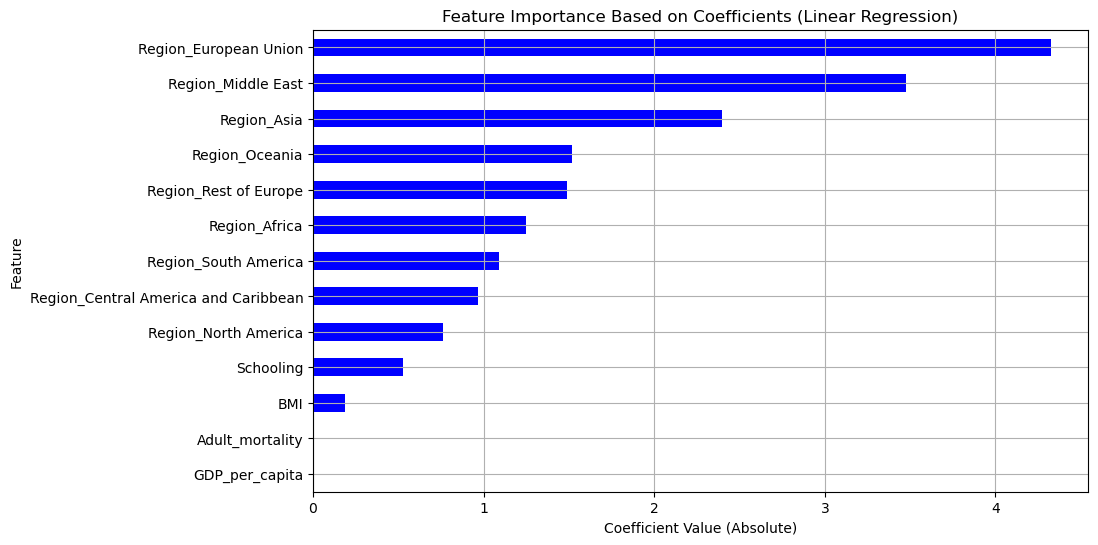

In [9]:
# Fit the model on entire training set to visualize coefficients
lr_model.fit(X, y)

# Get the coefficients from the model
coefficients = lr_model.coef_

# Pair and print coefficients with feature names
feature_importance = pd.Series(coefficients, index=features)
print(feature_importance)

# Sort the coefficients by absolute value
feature_importance_sorted = feature_importance.abs().sort_values(ascending=True)

# Plot the coefficients
plt.figure(figsize=(10, 6))
feature_importance_sorted.plot(kind='barh', color='blue')
plt.title('Feature Importance Based on Coefficients (Linear Regression)')
plt.xlabel('Coefficient Value (Absolute)')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

In [10]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)

# Set up K-fold cross-validation with k=5
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Lists to store training and validation MSE for each fold
training_errors = []
validation_errors = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    rf_model.fit(X_train, y_train)
    
    # Make predictions on the training set
    y_train_pred = rf_model.predict(X_train)
    training_mse = mean_squared_error(y_train, y_train_pred)
    training_errors.append(training_mse)
    
    # Make predictions on the validation set
    y_test_pred = rf_model.predict(X_test)
    validation_mse = mean_squared_error(y_test, y_test_pred)
    validation_errors.append(validation_mse)

# Print training and validation errors for each fold
print("Random Forest Regression")
print("Training Mean Squared Errors for each fold:", training_errors)
print("Validation Mean Squared Errors for each fold:", validation_errors)

# Calculate and print the mean of training and validation MSE
training_mse_mean = sum(training_errors) / len(training_errors)
validation_mse_mean = sum(validation_errors) / len(validation_errors)

print(f'Mean Training MSE: {training_mse_mean}')
print(f'Mean Validation MSE: {validation_mse_mean}')

# Print RMSE for validation
print(f'Root of Validation MSE: {math.sqrt(validation_mse_mean)}')


Random Forest Regression
Training Mean Squared Errors for each fold: [0.1566730390400084, 0.1565300451961111, 0.1541791312380144, 0.161981185842632, 0.1519876290784906]
Validation Mean Squared Errors for each fold: [1.0430384824511572, 1.0633997893677254, 0.992226382181013, 0.957995840018216, 1.289837841646325]
Mean Training MSE: 0.15627020607905132
Mean Validation MSE: 1.0692996671328874
Root of Validation MSE: 1.0340694692006371


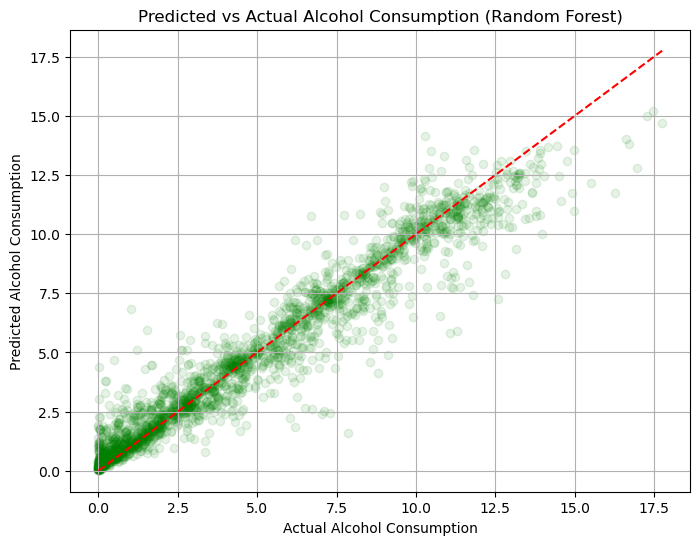

In [11]:
# Cross-validation predictions
y_pred_rf = cross_val_predict(rf_model, X, y, cv=kf)

# Plot Actual vs. Predicted for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_rf, color='green', alpha=0.1)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Predicted vs Actual Alcohol Consumption (Random Forest)')
plt.xlabel('Actual Alcohol Consumption')
plt.ylabel('Predicted Alcohol Consumption')
plt.grid(True)
plt.show()

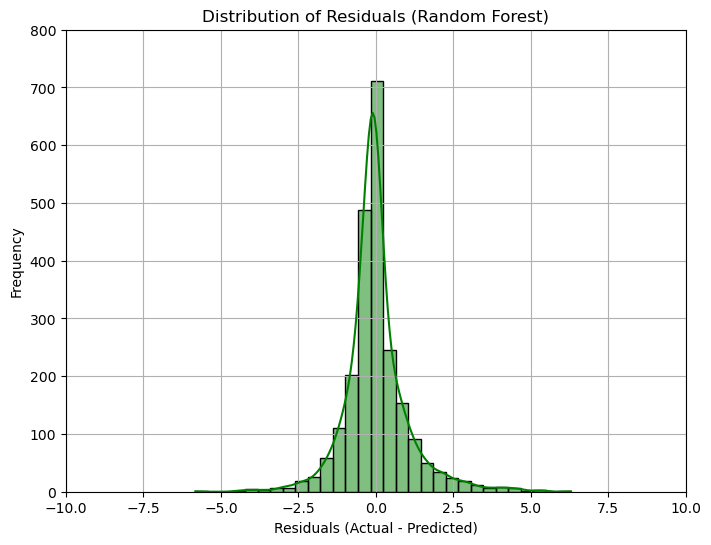

In [12]:
# Calculate residuals across all folds
residuals = y - y_pred_rf

# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.xlim(-10,10)
plt.ylim(0,800)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

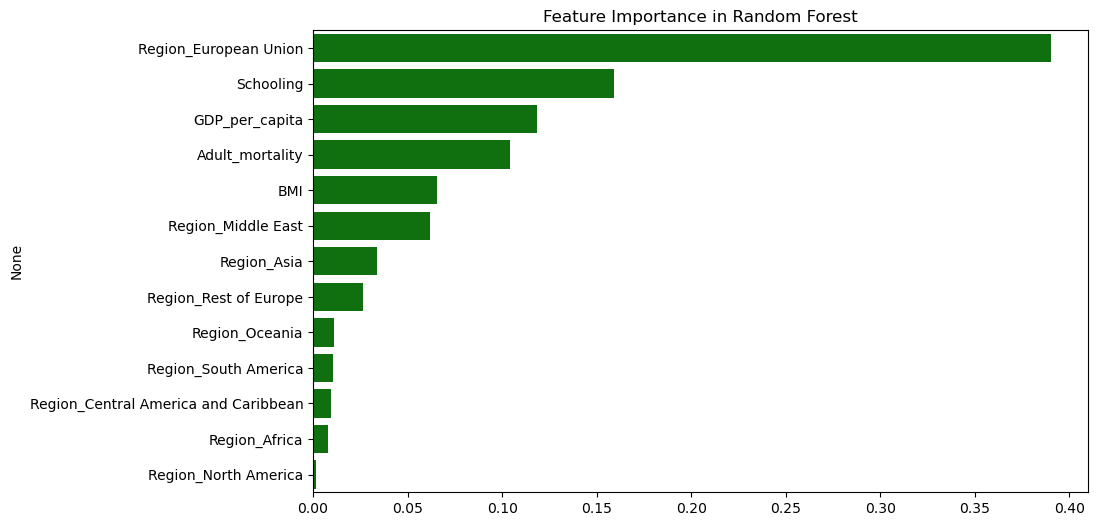

In [13]:
# Fit the model to the entire training set
rf_model.fit(X, y)

# Get feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], color='green')
plt.title('Feature Importance in Random Forest')
plt.show()

In [14]:
# Evaluate the Random Forest model on the test set
y_test_pred = rf_model.predict(X_test_final)
test_mse = mean_squared_error(y_test_final, y_test_pred)

# Print MSE and RMSE
print(f'Test MSE: {test_mse}')
print(f'Root of Test MSE: {math.sqrt(test_mse)}')

Test MSE: 0.7084181455867921
Root of Test MSE: 0.8416757960086485


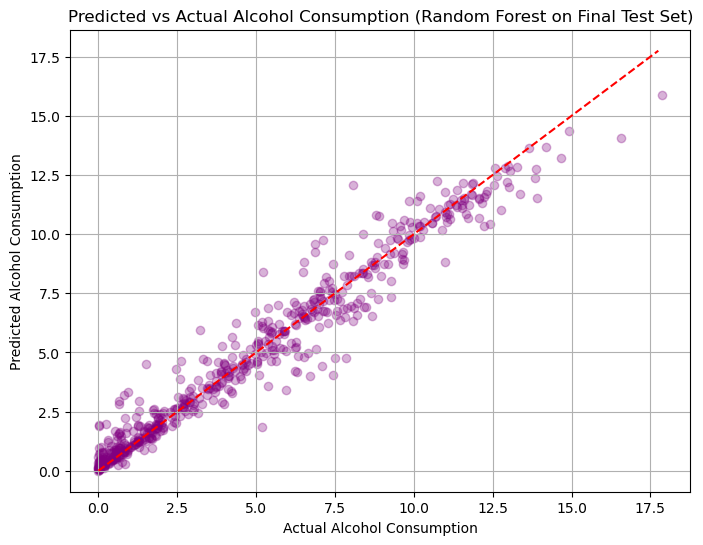

In [15]:
# Scatter plot of predicted vs actual values (random forest on final test set)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_final, y_test_pred, color='purple', alpha=0.3)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Predicted vs Actual Alcohol Consumption (Random Forest on Final Test Set)')
plt.xlabel('Actual Alcohol Consumption')
plt.ylabel('Predicted Alcohol Consumption')
plt.grid(True)
plt.show()